In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 24 not upgraded.
Need to get 9,599 kB of archives.
After this operation, 29.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 fonts-nanum all 20180306-3 [9,599 kB]
Fetched 9,599 kB in 1s (17.1 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 122518 files and dir

In [ ]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [ ]:
sk=pd.read_csv('/content/drive/MyDrive/2023-1학기-시계열팀주제분석/PreprocessedData/labeled/SK_label.csv')
hd=pd.read_csv('/content/drive/MyDrive/2023-1학기-시계열팀주제분석/PreprocessedData/labeled/hd_label.csv')
sh=pd.read_csv('/content/drive/MyDrive/2023-1학기-시계열팀주제분석/PreprocessedData/labeled/신한지주_결측치처리완.csv')

In [ ]:
sk.columns

Index(['날짜', 'year', 'month', 'day', '종가', '대비', '등락률', '거래량', '거래대금', '시가총액',
       '외국인 보유수량', '외국인 지분율', '토론방', '순매수_기관', '순매수_기타법인', '순매수_개인', '순매수_외국인',
       '검색어', '보도량', '기사감성점수', '뉴스심리지수', '비트코인종가', '비트코인거래량', '비트코인변동',
       '코스피종가', '코스피대비', '코스피등락률', '코스피거래량', '코스피거래대금', '코스피시가총액', '한은금리',
       '원/미국달러', '원/위안', '원/일본엔(100엔)', '원/유로', '경제심리지수(원계열)', '경제심리지수(순환변동치)',
       '산업생산지수', '물가상승률', '소비자신뢰지수', '소비자심리지수', '경제활동참가율(%)', '실업률(%)',
       '고용률(%)', '영문기사감성분석', 'day1_label', '3일 등락률', 'day3_label'],
      dtype='object')

In [ ]:
sk.isnull().sum()

날짜               0
year             0
month            0
day              0
종가               0
대비               0
등락률              0
거래량              0
거래대금             0
시가총액             0
외국인 보유수량         0
외국인 지분율          0
토론방              0
순매수_기관           0
순매수_기타법인         0
순매수_개인           0
순매수_외국인          0
검색어              0
보도량              0
기사감성점수           0
뉴스심리지수           0
비트코인종가           0
비트코인거래량          0
비트코인변동           0
코스피종가            0
코스피대비            0
코스피등락률           0
코스피거래량           0
코스피거래대금          0
코스피시가총액          0
한은금리             0
원/미국달러           0
원/위안             0
원/일본엔(100엔)      0
원/유로             0
경제심리지수(원계열)      0
경제심리지수(순환변동치)    0
산업생산지수           0
물가상승률            0
소비자신뢰지수          0
소비자심리지수          0
경제활동참가율(%)       0
실업률(%)           0
고용률(%)           0
영문기사감성분석         0
day1_label       0
3일 등락률           0
day3_label       0
dtype: int64

In [ ]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()

le.fit(sk['day1_label'].values)
sk['day1_label'] = le.transform(sk['day1_label'].values)

#le.fit(sk['day3_label'].values)
sk['day3_label'] = le.transform(sk['day3_label'].values)

hd['day1_label'] = le.transform(hd['day1_label'].values)
hd['day3_label'] = le.transform(hd['day3_label'].values)
sh['day1_label'] = le.transform(sh['day1_label'].values)
sh['day3_label'] = le.transform(sh['day3_label'].values)

# buy = 0 (매수)
# maintain = 1 (유지)
# sell = 2 (매도)

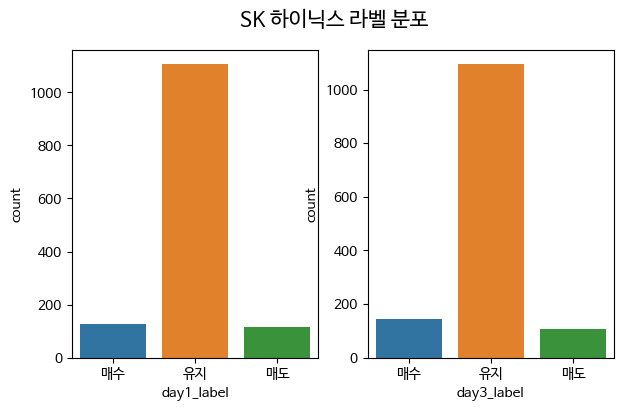

In [ ]:
fig, axes = plt.subplots(1,2, figsize=(7, 4))
sns.countplot(x='day1_label', data=sk, ax=axes[0])
axes[0].set_xticks([0,1,2], ['매수', '유지', '매도'])
sns.countplot(x='day3_label', data=sk, ax=axes[1])
axes[1].set_xticks([0,1,2], ['매수', '유지', '매도'])
plt.suptitle('SK 하이닉스 라벨 분포', fontsize=15)
plt.show()

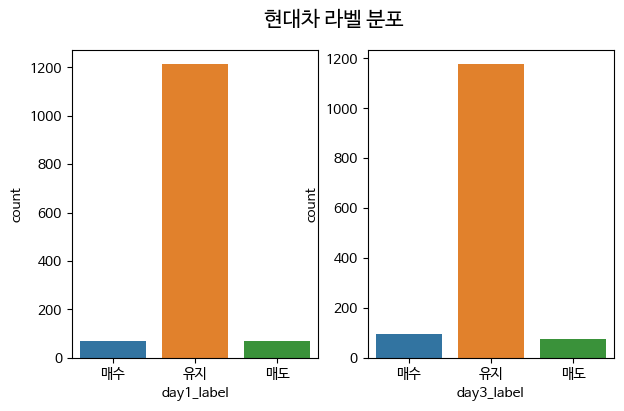

In [ ]:
fig, axes = plt.subplots(1,2, figsize=(7, 4))
sns.countplot(x='day1_label', data=hd, ax=axes[0])
axes[0].set_xticks([0,1,2], ['매수', '유지', '매도'])
sns.countplot(x='day3_label', data=hd, ax=axes[1])
axes[1].set_xticks([0,1,2], ['매수', '유지', '매도'])
plt.suptitle('현대차 라벨 분포', fontsize=15)
plt.show()

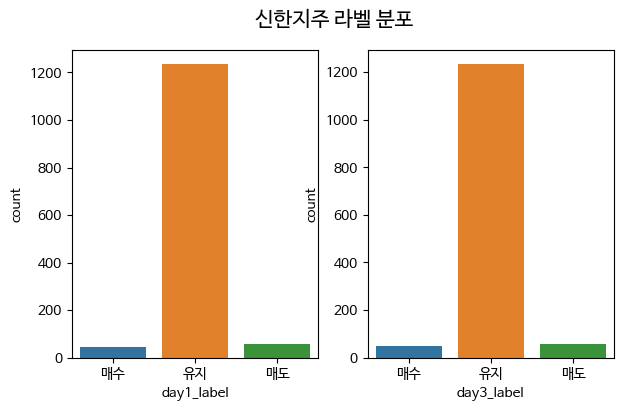

In [ ]:
fig, axes = plt.subplots(1,2, figsize=(7, 4))
sns.countplot(x='day1_label', data=sh, ax=axes[0])
axes[0].set_xticks([0,1,2], ['매수', '유지', '매도'])
sns.countplot(x='day3_label', data=sh, ax=axes[1])
axes[1].set_xticks([0,1,2], ['매수', '유지', '매도'])
plt.suptitle('신한지주 라벨 분포', fontsize=15)
plt.show()

In [ ]:
train = sk.iloc[:round(len(sk)*0.9), :]
test = sk.iloc[round(len(sk)*0.9)+1:, :]
len(train), len(test)

(1213, 134)

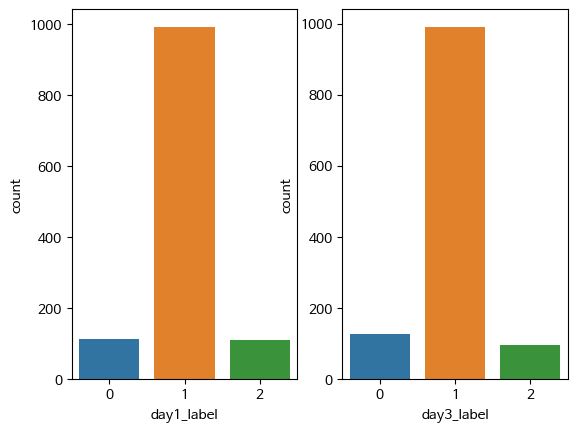

In [ ]:
fig, axes = plt.subplots(1,2)
sns.countplot(x='day1_label', data=train, ax=axes[0])
sns.countplot(x='day3_label', data=train, ax=axes[1])
plt.show()

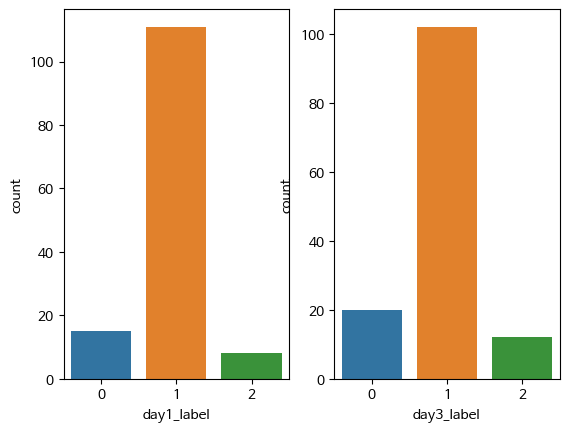

In [ ]:
fig, axes = plt.subplots(1,2)
sns.countplot(x='day1_label', data=test, ax=axes[0])
sns.countplot(x='day3_label', data=test, ax=axes[1])
plt.show()

In [ ]:
sk0 = sk[sk['day1_label']==0]
sk1 = sk[sk['day1_label']==1]
sk2 = sk[sk['day1_label']==2]

In [ ]:
sk0.describe()

,year,month,day,종가,대비,등락률,거래량,거래대금,시가총액,외국인 보유수량,...,물가상승률,소비자신뢰지수,소비자심리지수,경제활동참가율(%),실업률(%),고용률(%),영문기사감성분석,day1_label,3일 등락률,day3_label
count,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,1.260000e+02,1.260000e+02,1.260000e+02,1.260000e+02,...,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.0,126.000000,126.000000
mean,2019.801587,6.206349,14.761905,91644.444444,3915.079365,4.468254,5.421543e+06,4.962999e+11,6.671737e+13,3.606165e+08,...,101.533548,96.808730,97.411111,62.966667,3.731746,60.618254,-0.028295,0.0,4.554683,0.571429
std,1.725201,3.763652,8.590626,19454.268655,1683.570846,1.632846,1.942475e+06,2.234041e+11,1.416275e+13,8.123126e+06,...,3.857366,9.859339,9.355283,0.870954,0.727918,1.188640,0.217041,0.0,4.134659,0.512696
min,2017.000000,1.000000,1.000000,63600.000000,1900.000000,3.010000,2.185525e+06,1.525535e+11,4.630095e+13,3.418146e+08,...,97.347000,70.800000,73.300000,60.900000,2.100000,57.400000,-0.757900,0.0,-6.970000,0.000000
25%,2018.250000,3.000000,8.000000,78700.000000,2800.000000,3.337500,3.983208e+06,3.371555e+11,5.729379e+13,3.555398e+08,...,99.014500,90.700000,91.200000,62.250000,3.100000,59.650000,-0.140145,0.0,1.725000,0.000000
50%,2020.000000,6.000000,14.500000,85900.000000,3450.000000,3.835000,5.066241e+06,4.355280e+11,6.253540e+13,3.621251e+08,...,99.940000,97.950000,98.300000,63.100000,3.700000,60.800000,-0.006884,0.0,4.670000,1.000000
75%,2021.000000,10.000000,22.000000,97850.000000,4375.000000,4.947500,6.685976e+06,6.127136e+11,7.123503e+13,3.662430e+08,...,102.032500,103.875000,103.900000,63.500000,4.200000,61.400000,0.080919,0.0,6.955000,1.000000
max,2023.000000,12.000000,31.000000,148500.000000,12500.000000,13.400000,1.164224e+07,1.438188e+12,1.081084e+14,3.771320e+08,...,110.560000,112.000000,112.000000,64.900000,5.700000,63.000000,0.440400,0.0,14.430000,2.000000


In [ ]:
sk1.describe()

,year,month,day,종가,대비,등락률,거래량,거래대금,시가총액,외국인 보유수량,...,물가상승률,소비자신뢰지수,소비자심리지수,경제활동참가율(%),실업률(%),고용률(%),영문기사감성분석,day1_label,3일 등락률,day3_label
count,1105.000000,1105.000000,1105.000000,1105.00000,1105.000000,1105.000000,1.105000e+03,1.105000e+03,1.105000e+03,1.105000e+03,...,1105.000000,1105.000000,1105.000000,1105.000000,1105.000000,1105.000000,1105.000000,1105.0,1105.000000,1105.000000
mean,2019.892308,6.660633,16.050679,91523.61991,-55.746606,-0.046253,3.333103e+06,3.081085e+11,6.662941e+13,3.608679e+08,...,101.846508,98.213122,98.741176,63.205249,3.549955,60.960905,-0.044139,1.0,0.089122,0.969231
std,1.682762,3.473729,8.715572,19332.47328,1388.411539,1.467497,1.361267e+06,1.545040e+11,1.407409e+13,8.983148e+06,...,3.789234,8.805406,8.414586,0.776798,0.664936,1.037089,0.206239,0.0,3.382607,0.359843
min,2017.000000,1.000000,1.000000,58300.00000,-4000.000000,-2.990000,1.190162e+06,9.343244e+10,4.244254e+13,3.328781e+08,...,97.347000,70.800000,73.300000,60.900000,2.100000,57.400000,-0.880700,1.0,-11.930000,0.000000
25%,2018.000000,4.000000,8.000000,78600.00000,-1000.000000,-1.210000,2.386222e+06,2.021984e+11,5.722099e+13,3.543118e+08,...,99.311000,92.000000,92.900000,62.600000,3.000000,60.400000,-0.154520,1.0,-2.290000,1.000000
50%,2020.000000,7.000000,16.000000,84600.00000,0.000000,0.000000,3.072911e+06,2.690815e+11,6.158900e+13,3.628607e+08,...,100.090000,100.000000,100.300000,63.300000,3.600000,61.200000,-0.025020,1.0,-0.120000,1.000000
75%,2021.000000,10.000000,23.000000,102000.00000,900.000000,1.000000,3.934389e+06,3.799672e+11,7.425624e+13,3.677343e+08,...,103.870000,103.900000,104.100000,63.600000,4.000000,61.500000,0.056762,1.0,2.410000,1.000000
max,2023.000000,12.000000,31.000000,147000.00000,4000.000000,2.980000,1.205240e+07,1.365280e+12,1.070163e+14,3.790958e+08,...,110.560000,112.000000,112.000000,64.900000,5.700000,63.000000,0.872000,1.0,14.360000,2.000000


In [ ]:
sk2.describe()

,year,month,day,종가,대비,등락률,거래량,거래대금,시가총액,외국인 보유수량,...,물가상승률,소비자신뢰지수,소비자심리지수,경제활동참가율(%),실업률(%),고용률(%),영문기사감성분석,day1_label,3일 등락률,day3_label
count,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,1.170000e+02,1.170000e+02,1.170000e+02,1.170000e+02,...,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.0,117.000000,117.000000
mean,2019.726496,6.034188,17.076923,88958.974359,-3620.512821,-3.957350,5.934748e+06,5.382208e+11,6.476234e+13,3.615535e+08,...,101.351179,97.445299,97.978632,63.044444,3.676068,60.723077,-0.083757,2.0,-4.287778,1.427350
std,1.679614,3.431426,8.579400,20822.038034,1514.444160,1.424375,2.609234e+06,2.921116e+11,1.515849e+13,8.917820e+06,...,3.510554,9.650974,9.101419,0.899564,0.748291,1.223293,0.207247,0.0,4.108399,0.530391
min,2017.000000,1.000000,1.000000,57700.000000,-7300.000000,-9.080000,2.188097e+06,1.753053e+11,4.200574e+13,3.409665e+08,...,97.347000,70.800000,73.300000,60.900000,2.100000,57.400000,-0.648600,2.0,-14.390000,0.000000
25%,2018.000000,3.000000,10.000000,73800.000000,-4500.000000,-4.510000,4.139983e+06,3.654273e+11,5.372657e+13,3.551274e+08,...,99.187000,92.500000,93.500000,62.400000,3.100000,60.000000,-0.199900,2.0,-7.060000,1.000000
50%,2020.000000,6.000000,18.000000,81800.000000,-3500.000000,-3.720000,5.318487e+06,4.520313e+11,5.955059e+13,3.632712e+08,...,99.940000,98.600000,99.500000,63.200000,3.600000,61.100000,-0.055474,2.0,-4.680000,1.000000
75%,2021.000000,9.000000,25.000000,100500.000000,-2800.000000,-3.290000,7.076375e+06,6.374400e+11,7.316424e+13,3.682615e+08,...,102.050000,103.800000,103.800000,63.600000,4.200000,61.400000,0.009200,2.0,-1.900000,2.000000
max,2023.000000,12.000000,31.000000,142000.000000,3500.000000,3.000000,1.915065e+07,1.936648e+12,1.033763e+14,3.781413e+08,...,110.560000,112.000000,112.000000,64.900000,5.700000,63.000000,0.493900,2.0,16.280000,2.000000


In [ ]:
#이걸로 boxplot
#이걸로 ks-test

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
sk.columns

Index(['날짜', 'year', 'month', 'day', '종가', '대비', '등락률', '거래량', '거래대금', '시가총액',
       '외국인 보유수량', '외국인 지분율', '토론방', '순매수_기관', '순매수_기타법인', '순매수_개인', '순매수_외국인',
       '검색어', '보도량', '기사감성점수', '뉴스심리지수', '비트코인종가', '비트코인거래량', '비트코인변동',
       '코스피종가', '코스피대비', '코스피등락률', '코스피거래량', '코스피거래대금', '코스피시가총액', '한은금리',
       '원/미국달러', '원/위안', '원/일본엔(100엔)', '원/유로', '경제심리지수(원계열)', '경제심리지수(순환변동치)',
       '산업생산지수', '물가상승률', '소비자신뢰지수', '소비자심리지수', '경제활동참가율(%)', '실업률(%)',
       '고용률(%)', '영문기사감성분석', 'day1_label', '3일 등락률', 'day3_label'],
      dtype='object')

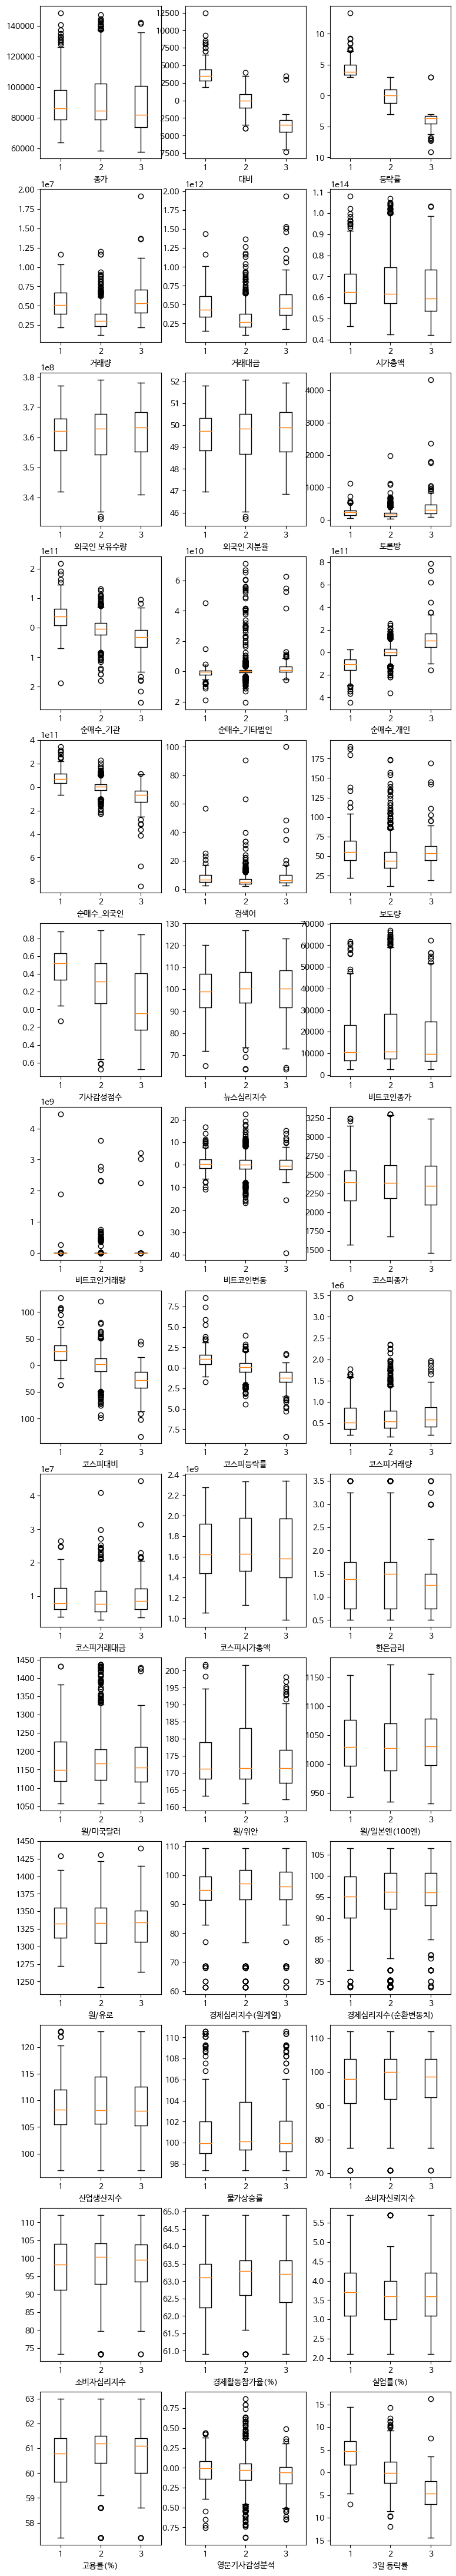

In [ ]:
from scipy.stats import kstest

cols = sk.drop(['날짜', 'year', 'month', 'day', 'day1_label', 'day3_label'], axis=1).columns
c = [0,1,2,0,1,2,0,1,2,0,1,2,0,1,2,0,1,2,0,1,2,0,1,2,0,1,2,0,1,2,0,1,2,0,1,2,0,1,2,0,1,2]
r = np.repeat([0,1,2,3,4,5,6,7,8,9,10,11,12,13], 3)

fig, ax = plt.subplots(14,3, figsize=(9, 56))
for i, col in enumerate(cols):
    ax[r[i], c[i]].boxplot([sk0[col], sk1[col], sk2[col]])
    ax[r[i], c[i]].set_xlabel(col)
plt.show()

boxplot을 통한 변수선택 (SK)

: 거래량, 거래대금, (토론방), 순매수_기관, 순매수_개인, 순매수_외국인, 보도량, 기사감성점수, 코스피 등락률

In [ ]:
rst = kstest(sk0['시가총액'], sk1['시가총액'])
rst[1] #pvalue

0.48126483139101073

# KS test (1일 등락률)

## sk하이닉스

In [ ]:
sk=pd.read_csv('/content/drive/MyDrive/2023-1학기-시계열팀주제분석/PreprocessedData/labeled/SK_label.csv')

In [ ]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()

le.fit(sk['day1_label'].values)
sk['day1_label'] = le.transform(sk['day1_label'].values)

#le.fit(sk['day3_label'].values)
sk['day3_label'] = le.transform(sk['day3_label'].values)

# buy = 0 (매수)
# maintain = 1 (유지)
# sell = 2 (매도)

In [ ]:
sk0 = sk[sk['day1_label']==0]
sk1 = sk[sk['day1_label']==1]
sk2 = sk[sk['day1_label']==2]

In [ ]:
from scipy.stats import kstest

cols = sk.drop(['날짜', 'year', 'month', 'day', 'day1_label', 'day3_label', '대비', '코스피대비'], axis=1).columns
signif_all = []
signif_maint =[]
signifsk = []
skdf = pd.DataFrame({'column':cols, 'sk_b-m':None, 'sk_m-s':None, 'sk_b-s':None})

for i, c in enumerate(cols):
    rst1 = kstest(sk0[c], sk1[c])
    rst2 = kstest(sk1[c], sk2[c])
    rst3 = kstest(sk0[c], sk2[c])

    skdf.iloc[i, 1] = rst1[1]
    skdf.iloc[i, 2] = rst2[1]
    skdf.iloc[i, 3] = rst3[1]

    # 매도-유지, 유지-매수, 매도-매수 세 가지 분포가 모두 유의하게 다른 경우
    if (rst1[1]<0.05) and (rst2[1]<0.05) and (rst3[1]<0.05):
        signif_all.append(c)

    # 매도-유지, 유지-매수 두 가지 분포가 유의하게 다른 경우
    if (rst1[1]<0.05) and (rst2[1]<0.05):
        signif_maint.append(c)

    # 매도-유지, 유지-매수, 매도-매수 세 가지 중 두 가지 이상이 유의하게 다른 경우
    if (rst1[1]<0.05) and (rst2[1]<0.05):
        signifsk.append(c)
    elif (rst2[1]<0.05) and (rst3[1]<0.05):
        signifsk.append(c)
    elif (rst1[1]<0.05) and (rst3[1]<0.05):
        signifsk.append(c)

In [ ]:
# 매도-유지, 유지-매수, 매도-매수 세 가지 분포가 모두 유의하게 다른 경우
signif_all

['등락률',
 '토론방',
 '순매수_기관',
 '순매수_기타법인',
 '순매수_개인',
 '순매수_외국인',
 '기사감성점수',
 '코스피등락률',
 '3일 등락률']

In [ ]:
# 매도-유지, 유지-매수 두 가지 분포가 유의하게 다른 경우
signif_maint, len(signif_maint)

(['등락률',
  '거래량',
  '거래대금',
  '토론방',
  '순매수_기관',
  '순매수_기타법인',
  '순매수_개인',
  '순매수_외국인',
  '검색어',
  '보도량',
  '기사감성점수',
  '코스피등락률',
  '3일 등락률'],
 13)

In [ ]:
# 매도-유지, 유지-매수, 매도-매수 세 가지 중 두 가지 이상이 유의하게 다른 경우
signifsk, len(signifsk)

(['종가',
  '등락률',
  '거래량',
  '거래대금',
  '시가총액',
  '토론방',
  '순매수_기관',
  '순매수_기타법인',
  '순매수_개인',
  '순매수_외국인',
  '검색어',
  '보도량',
  '기사감성점수',
  '코스피등락률',
  '3일 등락률'],
 15)

## 현대차

In [ ]:
hd=pd.read_csv('/content/drive/MyDrive/2023-1학기-시계열팀주제분석/PreprocessedData/labeled/hd_label.csv')

In [ ]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()

le.fit(hd['day1_label'].values)
hd['day1_label'] = le.transform(hd['day1_label'].values)

#le.fit(sk['day3_label'].values)
hd['day3_label'] = le.transform(hd['day3_label'].values)

# buy = 0 (매수)
# maintain = 1 (유지)
# sell = 2 (매도)

In [ ]:
hd0 = hd[hd['day1_label']==0]
hd1 = hd[hd['day1_label']==1]
hd2 = hd[hd['day1_label']==2]

In [ ]:
from scipy.stats import kstest

cols = hd.drop(['날짜', 'year', 'month', 'day', 'day1_label', 'day3_label', '대비', '코스피대비'], axis=1).columns
signif_all = []
signif_maint = []
signifhd = []
hddf = pd.DataFrame({'column':cols, 'hd_b-m':None, 'hd_m-s':None, 'hd_b-s':None})

for i, c in enumerate(cols):
    rst1 = kstest(hd0[c], hd1[c])
    rst2 = kstest(hd1[c], hd2[c])
    rst3 = kstest(hd0[c], hd2[c])

    hddf.iloc[i, 1] = rst1[1]
    hddf.iloc[i, 2] = rst2[1]
    hddf.iloc[i, 3] = rst3[1]

    # 매도-유지, 유지-매수, 매도-매수 세 가지 분포가 모두 유의하게 다른 경우
    if (rst1[1]<0.05) and (rst2[1]<0.05) and (rst3[1]<0.05):
        signif_all.append(c)

    # 매도-유지, 유지-매수 두 가지 분포가 유의하게 다른 경우
    if (rst1[1]<0.05) and (rst2[1]<0.05):
        signif_maint.append(c)

    # 매도-유지, 유지-매수, 매도-매수 세 가지 중 두 가지 이상이 유의하게 다른 경우
    if (rst1[1]<0.05) and (rst2[1]<0.05):
        signifhd.append(c)
    elif (rst2[1]<0.05) and (rst3[1]<0.05):
        signifhd.append(c)
    elif (rst1[1]<0.05) and (rst3[1]<0.05):
        signifhd.append(c)

In [ ]:
# 매도-유지, 유지-매수, 매도-매수 세 가지 분포가 모두 유의하게 다른 경우
signif_all

['등락률', '순매수_기관', '순매수_개인', '순매수_외국인', '기사감성점수', '코스피등락률', '3일_등락률']

In [ ]:
# 매도-유지, 유지-매수 두 가지 분포가 유의하게 다른 경우
signif_maint, len(signif_maint)

(['등락률',
  '거래량',
  '거래대금',
  '외국인 보유수량',
  '외국인 지분율',
  '토론방',
  '순매수_기관',
  '순매수_개인',
  '순매수_외국인',
  '검색어',
  '보도량',
  '기사감성점수',
  '코스피등락률',
  '코스피거래량',
  '코스피거래대금',
  '원/일본엔(100엔)',
  '경제심리지수(원계열)',
  '경제심리지수(순환변동치)',
  '물가상승률',
  '소비자신뢰지수',
  '소비자심리지수',
  '경제활동참가율(%)',
  '실업률(%)',
  '고용률(%)',
  '3일_등락률'],
 25)

In [ ]:
# 매도-유지, 유지-매수, 매도-매수 세 가지 중 두 가지 이상이 유의하게 다른 경우
signifhd, len(signifhd)

(['등락률',
  '거래량',
  '거래대금',
  '외국인 보유수량',
  '외국인 지분율',
  '토론방',
  '순매수_기관',
  '순매수_기타법인',
  '순매수_개인',
  '순매수_외국인',
  '검색어',
  '보도량',
  '기사감성점수',
  '코스피등락률',
  '코스피거래량',
  '코스피거래대금',
  '원/일본엔(100엔)',
  '경제심리지수(원계열)',
  '경제심리지수(순환변동치)',
  '물가상승률',
  '소비자신뢰지수',
  '소비자심리지수',
  '경제활동참가율(%)',
  '실업률(%)',
  '고용률(%)',
  '3일_등락률'],
 26)

## 신한지주

In [ ]:
sh=pd.read_csv('/content/drive/MyDrive/2023-1학기-시계열팀주제분석/PreprocessedData/labeled/신한지주_결측치처리완.csv')

In [ ]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()

le.fit(sh['day1_label'].values)
sh['day1_label'] = le.transform(sh['day1_label'].values)

#le.fit(sk['day3_label'].values)
sh['day3_label'] = le.transform(sh['day3_label'].values)

# buy = 0 (매수)
# maintain = 1 (유지)
# sell = 2 (매도)

KeyError: ignored

In [ ]:
sh0 = sh[sh['day1_label']==0]
sh1 = sh[sh['day1_label']==1]
sh2 = sh[sh['day1_label']==2]

In [ ]:
from scipy.stats import kstest

cols = sh.drop(['날짜', 'year', 'month', 'day', 'day1_label', 'day3_label', '대비', '코스피대비'], axis=1).columns
signif_all = []
signif_maint = []
signifsh = []
shdf = pd.DataFrame({'column':cols, 'sh_b-m':None, 'sh_m-s':None, 'sh_b-s':None})

for i, c in enumerate(cols):
    rst1 = kstest(sh0[c], sh1[c])
    rst2 = kstest(sh1[c], sh2[c])
    rst3 = kstest(sh0[c], sh2[c])

    shdf.iloc[i, 1] = rst1[1]
    shdf.iloc[i, 2] = rst2[1]
    shdf.iloc[i, 3] = rst3[1]

    # 매도-유지, 유지-매수, 매도-매수 세 가지 분포가 모두 유의하게 다른 경우
    if (rst1[1]<0.05) and (rst2[1]<0.05) and (rst3[1]<0.05):
        signif_all.append(c)

    # 매도-유지, 유지-매수 두 가지 분포가 유의하게 다른 경우
    if (rst1[1]<0.05) and (rst2[1]<0.05):
        signif_maint.append(c)

    # 매도-유지, 유지-매수, 매도-매수 세 가지 중 두 가지 이상이 유의하게 다른 경우
    if (rst1[1]<0.05) and (rst2[1]<0.05):
        signifsh.append(c)
    elif (rst2[1]<0.05) and (rst3[1]<0.05):
        signifsh.append(c)
    elif (rst1[1]<0.05) and (rst3[1]<0.05):
        signifsh.append(c)

In [ ]:
# 매도-유지, 유지-매수, 매도-매수 세 가지 분포가 모두 유의하게 다른 경우
signif_all

['등락률', '순매수_기관', '순매수_기타법인', '순매수_개인', '순매수_외국인', '코스피등락률', '3일_등락률']

In [ ]:
# 매도-유지, 유지-매수 두 가지 분포가 유의하게 다른 경우
signif_maint, len(signif_maint)

(['종가',
  '등락률',
  '거래량',
  '거래대금',
  '시가총액',
  '토론방',
  '순매수_기관',
  '순매수_기타법인',
  '순매수_개인',
  '순매수_외국인',
  '검색어',
  '코스피종가',
  '코스피등락률',
  '코스피거래량',
  '코스피거래대금',
  '코스피시가총액',
  '원/일본엔(100엔)',
  '원/유로',
  '경제심리지수(원계열)',
  '경제심리지수(순환변동치)',
  '물가상승률',
  '소비자신뢰지수',
  '소비자심리지수',
  '경제활동참가율(%)',
  '고용률(%)',
  '3일_등락률'],
 26)

In [ ]:
# 매도-유지, 유지-매수, 매도-매수 세 가지 중 두 가지 이상이 유의하게 다른 경우
signifsh, len(signifsh)

(['종가',
  '등락률',
  '거래량',
  '거래대금',
  '시가총액',
  '외국인 보유수량',
  '외국인 지분율',
  '토론방',
  '순매수_기관',
  '순매수_기타법인',
  '순매수_개인',
  '순매수_외국인',
  '검색어',
  '코스피종가',
  '코스피등락률',
  '코스피거래량',
  '코스피거래대금',
  '코스피시가총액',
  '한은금리',
  '원/일본엔(100엔)',
  '원/유로',
  '경제심리지수(원계열)',
  '경제심리지수(순환변동치)',
  '물가상승률',
  '소비자신뢰지수',
  '소비자심리지수',
  '경제활동참가율(%)',
  '고용률(%)',
  '3일_등락률'],
 29)

## 1일 등락률

In [ ]:
df = pd.merge(skdf, hddf, on='column')
df = pd.merge(df, shdf, on='column')
df

,column,sk_b-m,sk_m-s,sk_b-s,hd_b-m,hd_m-s,hd_b-s,sh_b-m,sh_m-s,sh_b-s
0,종가,0.481265,0.007917,0.006861,0.115512,0.000851,0.241368,0.0,0.000007,0.537069
1,등락률,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,거래량,0.0,0.0,0.56672,0.0,0.0,0.112084,0.0,0.0,0.062329
3,거래대금,0.0,0.0,0.629827,0.0,0.0,0.167049,0.0,0.0,0.245789
4,시가총액,0.481265,0.007917,0.006861,0.115512,0.000851,0.241368,0.0,0.000007,0.572946
5,외국인 보유수량,0.289818,0.679953,0.317906,0.035798,0.000182,0.072929,0.000098,0.545278,0.00607
6,외국인 지분율,0.300838,0.679953,0.317906,0.035798,0.000182,0.072929,0.000666,0.071997,0.047966
7,토론방,0.0,0.0,0.000254,0.0,0.0,0.993636,0.000388,0.000004,0.507908
8,순매수_기관,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.019473,0.0
9,순매수_기타법인,0.000071,0.0,0.0,0.126738,0.000065,0.046016,0.000693,0.000006,0.000968


In [ ]:
print(signifsk)
print(signifhd)
print(signifsh)

['종가', '등락률', '거래량', '거래대금', '시가총액', '토론방', '순매수_기관', '순매수_기타법인', '순매수_개인', '순매수_외국인', '검색어', '보도량', '기사감성점수', '코스피등락률', '3일 등락률']
['등락률', '거래량', '거래대금', '외국인 보유수량', '외국인 지분율', '토론방', '순매수_기관', '순매수_기타법인', '순매수_개인', '순매수_외국인', '검색어', '보도량', '기사감성점수', '코스피등락률', '코스피거래량', '코스피거래대금', '원/일본엔(100엔)', '경제심리지수(원계열)', '경제심리지수(순환변동치)', '물가상승률', '소비자신뢰지수', '소비자심리지수', '경제활동참가율(%)', '실업률(%)', '고용률(%)', '3일_등락률']
['종가', '등락률', '거래량', '거래대금', '시가총액', '외국인 보유수량', '외국인 지분율', '토론방', '순매수_기관', '순매수_기타법인', '순매수_개인', '순매수_외국인', '검색어', '코스피종가', '코스피등락률', '코스피거래량', '코스피거래대금', '코스피시가총액', '한은금리', '원/일본엔(100엔)', '원/유로', '경제심리지수(원계열)', '경제심리지수(순환변동치)', '물가상승률', '소비자신뢰지수', '소비자심리지수', '경제활동참가율(%)', '고용률(%)', '3일_등락률']


In [ ]:
list(set(signifsk) & set(signifhd) & set(signifsh))
# 1일 등락률일 때
# sk, 현대, 신한 모두에서 셋 중 둘 이상 유의했던 변수

['코스피등락률',
 '순매수_개인',
 '등락률',
 '거래량',
 '순매수_기관',
 '순매수_기타법인',
 '검색어',
 '거래대금',
 '토론방',
 '순매수_외국인']

In [ ]:
sig = []
for c in range(len(df)):
    cnt = 0
    for i in df.iloc[c, 1:]:
        if i < 0.05:
            cnt+=1
    if cnt >= 6:
        sig.append(df.iloc[c, 0])
sig
# 1일 등락률 (sk, 현대차, 신한 종합)
# 9번의 KS test 중 6번 이상 유의했던 변수

['등락률',
 '거래량',
 '거래대금',
 '토론방',
 '순매수_기관',
 '순매수_기타법인',
 '순매수_개인',
 '순매수_외국인',
 '검색어',
 '기사감성점수',
 '코스피등락률']

# KS test (3일 등락률)

## sk하이닉스

In [ ]:
sk0 = sk[sk['day3_label']==0]
sk1 = sk[sk['day3_label']==1]
sk2 = sk[sk['day3_label']==2]

In [ ]:
from scipy.stats import kstest

cols = sk.drop(['날짜', 'year', 'month', 'day', 'day1_label', 'day3_label', '대비', '코스피대비'], axis=1).columns
signif_all = []
signif_maint =[]
signifsk = []
skdf = pd.DataFrame({'column':cols, 'sk_b-m':None, 'sk_m-s':None, 'sk_b-s':None})

for i, c in enumerate(cols):
    rst1 = kstest(sk0[c], sk1[c])
    rst2 = kstest(sk1[c], sk2[c])
    rst3 = kstest(sk0[c], sk2[c])

    skdf.iloc[i, 1] = rst1[1]
    skdf.iloc[i, 2] = rst2[1]
    skdf.iloc[i, 3] = rst3[1]

    # 매도-유지, 유지-매수, 매도-매수 세 가지 분포가 모두 유의하게 다른 경우
    if (rst1[1]<0.05) and (rst2[1]<0.05) and (rst3[1]<0.05):
        signif_all.append(c)

    # 매도-유지, 유지-매수 두 가지 분포가 유의하게 다른 경우
    if (rst1[1]<0.05) and (rst2[1]<0.05):
        signif_maint.append(c)

    # 매도-유지, 유지-매수, 매도-매수 세 가지 중 두 가지 이상이 유의하게 다른 경우
    if (rst1[1]<0.05) and (rst2[1]<0.05):
        signifsk.append(c)
    elif (rst2[1]<0.05) and (rst3[1]<0.05):
        signifsk.append(c)
    elif (rst1[1]<0.05) and (rst3[1]<0.05):
        signifsk.append(c)

In [ ]:
signifsk, len(signifsk)

(['종가',
  '등락률',
  '거래량',
  '거래대금',
  '시가총액',
  '토론방',
  '순매수_기관',
  '순매수_기타법인',
  '순매수_개인',
  '순매수_외국인',
  '검색어',
  '보도량',
  '기사감성점수',
  '뉴스심리지수',
  '코스피등락률',
  '3일 등락률'],
 16)

## 현대차

In [ ]:
hd0 = hd[hd['day3_label']==0]
hd1 = hd[hd['day3_label']==1]
hd2 = hd[hd['day3_label']==2]

In [ ]:
from scipy.stats import kstest

cols = hd.drop(['날짜', 'year', 'month', 'day', 'day1_label', 'day3_label', '대비', '코스피대비'], axis=1).columns
signif_all = []
signif_maint = []
signifhd = []
hddf = pd.DataFrame({'column':cols, 'hd_b-m':None, 'hd_m-s':None, 'hd_b-s':None})

for i, c in enumerate(cols):
    rst1 = kstest(hd0[c], hd1[c])
    rst2 = kstest(hd1[c], hd2[c])
    rst3 = kstest(hd0[c], hd2[c])

    hddf.iloc[i, 1] = rst1[1]
    hddf.iloc[i, 2] = rst2[1]
    hddf.iloc[i, 3] = rst3[1]

    # 매도-유지, 유지-매수, 매도-매수 세 가지 분포가 모두 유의하게 다른 경우
    if (rst1[1]<0.05) and (rst2[1]<0.05) and (rst3[1]<0.05):
        signif_all.append(c)

    # 매도-유지, 유지-매수 두 가지 분포가 유의하게 다른 경우
    if (rst1[1]<0.05) and (rst2[1]<0.05):
        signif_maint.append(c)

    # 매도-유지, 유지-매수, 매도-매수 세 가지 중 두 가지 이상이 유의하게 다른 경우
    if (rst1[1]<0.05) and (rst2[1]<0.05):
        signifhd.append(c)
    elif (rst2[1]<0.05) and (rst3[1]<0.05):
        signifhd.append(c)
    elif (rst1[1]<0.05) and (rst3[1]<0.05):
        signifhd.append(c)

In [ ]:
signifhd, len(signifhd)

(['종가',
  '등락률',
  '거래량',
  '거래대금',
  '시가총액',
  '외국인 보유수량',
  '외국인 지분율',
  '토론방',
  '순매수_기관',
  '순매수_기타법인',
  '순매수_개인',
  '순매수_외국인',
  '검색어',
  '보도량',
  '기사감성점수',
  '뉴스심리지수',
  '비트코인종가',
  '비트코인거래량',
  '코스피종가',
  '코스피등락률',
  '코스피거래량',
  '코스피거래대금',
  '코스피시가총액',
  '한은금리',
  '원/미국달러',
  '원/일본엔(100엔)',
  '경제심리지수(원계열)',
  '경제심리지수(순환변동치)',
  '물가상승률',
  '소비자신뢰지수',
  '소비자심리지수',
  '경제활동참가율(%)',
  '실업률(%)',
  '고용률(%)',
  '3일_등락률'],
 35)

## 신한지주

In [ ]:
sh0 = sh[sh['day3_label']==0]
sh1 = sh[sh['day3_label']==1]
sh2 = sh[sh['day3_label']==2]

In [ ]:
from scipy.stats import kstest

cols = sh.drop(['날짜', 'year', 'month', 'day', 'day1_label', 'day3_label', '대비', '코스피대비'], axis=1).columns
signif_all = []
signif_maint = []
signifsh = []
shdf = pd.DataFrame({'column':cols, 'sh_b-m':None, 'sh_m-s':None, 'sh_b-s':None})

for i, c in enumerate(cols):
    rst1 = kstest(sh0[c], sh1[c])
    rst2 = kstest(sh1[c], sh2[c])
    rst3 = kstest(sh0[c], sh2[c])

    shdf.iloc[i, 1] = rst1[1]
    shdf.iloc[i, 2] = rst2[1]
    shdf.iloc[i, 3] = rst3[1]

    # 매도-유지, 유지-매수, 매도-매수 세 가지 분포가 모두 유의하게 다른 경우
    if (rst1[1]<0.05) and (rst2[1]<0.05) and (rst3[1]<0.05):
        signif_all.append(c)

    # 매도-유지, 유지-매수 두 가지 분포가 유의하게 다른 경우
    if (rst1[1]<0.05) and (rst2[1]<0.05):
        signif_maint.append(c)

    # 매도-유지, 유지-매수, 매도-매수 세 가지 중 두 가지 이상이 유의하게 다른 경우
    if (rst1[1]<0.05) and (rst2[1]<0.05):
        signifsh.append(c)
    elif (rst2[1]<0.05) and (rst3[1]<0.05):
        signifsh.append(c)
    elif (rst1[1]<0.05) and (rst3[1]<0.05):
        signifsh.append(c)

In [ ]:
signifsh, len(signifsh)

(['종가',
  '등락률',
  '거래량',
  '거래대금',
  '시가총액',
  '외국인 보유수량',
  '외국인 지분율',
  '토론방',
  '순매수_기관',
  '순매수_기타법인',
  '순매수_개인',
  '순매수_외국인',
  '검색어',
  '보도량',
  '코스피종가',
  '코스피등락률',
  '코스피거래대금',
  '한은금리',
  '원/미국달러',
  '원/위안',
  '원/일본엔(100엔)',
  '원/유로',
  '경제심리지수(원계열)',
  '경제심리지수(순환변동치)',
  '물가상승률',
  '소비자신뢰지수',
  '소비자심리지수',
  '경제활동참가율(%)',
  '실업률(%)',
  '고용률(%)',
  '3일_등락률'],
 31)

## 3일 등락률

In [ ]:
df = pd.merge(skdf, hddf, on='column')
df = pd.merge(df, shdf, on='column')
df

,column,sk_b-m,sk_m-s,sk_b-s,hd_b-m,hd_m-s,hd_b-s,sh_b-m,sh_m-s,sh_b-s
0,종가,0.001187,0.018039,0.00016,0.009966,0.0,0.01648,0.002653,0.0,0.212069
1,등락률,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,거래량,0.0,0.0,0.017448,0.0,0.0,0.006065,0.0,0.0,0.152461
3,거래대금,0.0,0.0,0.173936,0.0,0.0,0.000912,0.0,0.0,0.017097
4,시가총액,0.001187,0.018039,0.00016,0.009389,0.0,0.027594,0.004054,0.0,0.236605
5,외국인 보유수량,0.175114,0.490117,0.348017,0.00012,0.003151,0.009552,0.002899,0.302678,0.022423
6,외국인 지분율,0.175114,0.577974,0.348017,0.00012,0.003151,0.009552,0.000379,0.095329,0.018081
7,토론방,0.011909,0.0,0.000001,0.0,0.0,0.917011,0.000255,0.001989,0.879497
8,순매수_기관,0.000128,0.001087,0.000078,0.000005,0.000084,0.000001,0.002336,0.010259,0.000142
9,순매수_기타법인,0.0,0.000015,0.0,0.000597,0.00071,0.246569,0.000274,0.000001,0.000005


In [ ]:
list(set(signifsk) & set(signifhd) & set(signifsh))
# 3일 등락률일 때
# sk, 현대, 신한 모두에서 셋 중 둘 이상 유의했던 변수

['코스피등락률',
 '순매수_개인',
 '등락률',
 '거래량',
 '순매수_기관',
 '순매수_기타법인',
 '보도량',
 '검색어',
 '종가',
 '시가총액',
 '거래대금',
 '토론방',
 '순매수_외국인']

In [ ]:
sig = []
for c in range(len(df)):
    cnt = 0
    for i in df.iloc[c, 1:]:
        if i < 0.05:
            cnt+=1
    if cnt >= 6:
        sig.append(df.iloc[c, 0])
sig
# 3일 등락률 (sk, 현대차, 신한 종합)
# 9번의 KS test 중 6번 이상 유의했던 변수

['종가',
 '등락률',
 '거래량',
 '거래대금',
 '시가총액',
 '토론방',
 '순매수_기관',
 '순매수_기타법인',
 '순매수_개인',
 '순매수_외국인',
 '검색어',
 '보도량',
 '기사감성점수',
 '코스피등락률',
 '코스피거래대금']